# Livrable 2 : Équipe 2
Willy Carlot(Chef de projet), Corentin Le Nozahic, Leo Vauthier, Ilias Tragha
---



# Contexte

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptees à différents types de territoires.

Notre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, Nous avons réalisés plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif.

Nous faisons partie de l’équipe mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer notre activité.


Autrement dit, dans une ère de transition écologie,réduire les émissions de gaz à effet de serre, la congestion urbaine et l'optimisation des ressources liés à la mobilité des personnes et des marchandises sont des defis cruciaux.

Notre structure **CESICDP**, proposons une solution d'optimisation des tournées de véhicules pour minimiser **les** distances parcourues, réduire les coûts logistiques et diminuer l'impact environnemental.

# Objectif

L'objectif de ce projet est de calculer des tournées optimales pour un ou plusieurs véhicules visitant un ensemble de villes avant de retourner au dépot initial, tout en minimisant la distance total.


# Modélisation du problème

Dans l’objectif de limiter les déplacements et la consommation des véhicules, il est nécessaire de modéliser notre problème. Afin de se rapprocher le plus possible de la réalité lors de nos résultats, nous avons choisi de représenter sous la forme d’un graphe $G = (V, E)$ la situation d’une ville connue, **Rouen**, avec :

- $V$ : l’ensemble des **sommets** représentant les intersections de la ville ;
- $E$ : l’ensemble des **arêtes** représentant les routes entre ces intersections.

*Dans le but d'évaluer, prouver et déterminer les limites de notre solution sur des villes plus ou moins denses, avec un grand ou un petit nombre de sommets, nous serons probablement amenés à générer artificiellement des villes*

Sur ce graphe $G$, les intersections sont donc représentées sous forme de sommets, tandis que les routes figureront sous forme d’arêtes.

Dans le cadre de l’amélioration continue, nous avons choisi de prendre en compte deux contraintes :

- **$C1$** : la distance entre les intersections, exprimée par une **pondération** $w : E \rightarrow \mathbb{R}_+$ associée à chaque arête du graphe.De plus, certaines routes peuvent être plus coûteuses ou interdites (par exemple, travaux ou routes bloquées). 

- **$C2$** : la prise en compte d’un **nombre multiple de camions** $n_V$, permettant de faire plusieurs sous-tournées multi-tours plutôt qu’une seule tournée unique.

Ces contraintes ont été choisies car elles sont les plus importantes à prendre en compte vis-a-vis d'une situation réelle. En effet, Les routes barrée et routes avec beaucoup de traffic sont très communes dans les grandes villes. La plupart (voir l'ensemble) des outils de génération d'iténéraires prennent en compte ces contraintes nous avons donc estimés que les $C1$ et $C2$ définies sont les plus intéressentes à mettre en place.

L’objectif de cette etude est de se rapprocher le plus possible d’une **solution viable** ( solution qui s’exécute dans un temps raisonnable ) et **optimisée** ( qui minimise la **somme totale des arêtes parcourues** par l’ensemble des véhicules ), permettant à un ensemble $n_V$ de véhicules de visiter **l’ensemble des points marqués** ( nœuds à desservir ) $M$, tout en revenant au point de départ ( dépot ) $D$.

Dans le cadre de notre étude, nous cherchons un ensemble de sommets :


$TV_0, TV_1, \dots, TV_n$

Décrivant les routes suivies par chaque véhicule, que nous notons globalement $TV$.

Dans le cadre de cett étude nous représentons le problème comme suit :

- $n_v$ : le nombre de véhicules disponibles
- $G = (V, E)$, avec $w : E \rightarrow \mathbb{R}_+$ la fonction de coût associée aux distances
- $D \subseteq V$ : le dépôt (point de départ et d’arrivée de tous les véhicules)
- $M_v \subseteq V$ : l'ensemble des sommets à visiter avec un véhicule pour avoir une solution valide
- $TV_n \subseteq V$, la route du véhicule $n_v \in \{1, ..., n_V\}$, dont la route commence et se termine par son point de départ $D$
- Chaque sommet $M_v \subseteq V \setminus \{D\}$ est visité **exactement une fois** par un unique véhicule (Sauf $D$).
- $k$ est le cardinal de notre graphe

## Fonction objective
Nous cherchons un ensemble de tournées $\{TV_1, ..., TV_{n}\}$ tel que:

- $\sum_{k=1}^{n_v} TV$ contienne l'ensemble des sommets $Mv$

Et que le coût total $w(i, j)$:

- $\sum_{k=1}^{n_v} TV \min \sum_{k=TV_1}^{TV_n} w(i, j)$ soit minimisé.


# Implémentation et exploitation
Une fois le problème modélisé mathématiquement et étude de la complexitée réalisée, nous en avons conclu que notre problème est NP-complet ce qui signifie qu'une instance de solution à notre problème est vérifiable en un temps polynomiale. Le test de l'ensemble des solutions étant trop couteux en temps et en puissance de calcul, il est nécessaire de faire appel à des méta-heuristiques nous permettant de trouver une solution optimale en un temps raisonnable. De nombreuses méta-heurisques existes et notre ploblème est np-complet on peut donc utiliser l'ensemble de méta-heuristiques existantes pour trouver une solution (même si certainement conviennent naturellement plus que d'autres à notre situation). Cependant chaque méta-heurisque va avoir une efficacitée différente en fonction des nombreux facteurs suivants :
- ses paramètres (comme le nombre d’itérations, nombre de véhicule, paramètres intrinsèque à la maté-heuristique, ...),

- les contraintes propres au problème.

- ainsi que les caractéristiques du graphe (nombre de sommets, nombre d’arêtes, pondérations, arêtes bloquées, etc.).


Nous avons donc sélectionnées 3 méta-heuristiques différentes afin de les comparer et en déduire à l'aide d'une etude expérimentale la mata-heuritique la plus proche d'une solution optimal. 

Afin diversifier nos résultats nous avons choisis de sélectionner un algorithme par trajectoire et deux algorithmes par population car notre situation s'y prête plus aisément(les fourmis utilisant cet algorithme pour trouver la route la plus courte jusqu'a la nourriture). Les trois méta-heuristiques retenues sont la recherche avec tabou, l'algorithme génétique et l'algorithme des colonies de fourmis. 

## Modélisation
Avant de pouvoir rechercher le meilleur chemin sur un graphe, il est nécessaire de modéliser notre situation sous forme de graphe.
Pour cela, nous avons utilisé les bibliothèques RandomGraph et MapGraph, qui permettent de générer des graphes selon plusieurs paramètres :
- Nombre de sommets
- Probabilité d'arrêtes
- Probabilité de route couteuse
- Probabilité de route barrée
Ces graph sont des objets networksx et sont affichée avec pyplot.

De plus afin d'avoir des graphes réalistes et de nous permettre de faire une étude complètes sur nos solutions La bibliothèque "MapGraph" nous génère un graph entre des villes du mondes avec des distances réelles(à vol d'oiseau). Tandis que "RandomGraph" nous permet de faire varier les situations afin de pouvoir analyser les résultats de notre algorithmes avec de grandes variations des paramètres.

### Génération d'un graphe
On commence par importer les dépendances et générer une seed :

In [9]:
import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

(<module 'numpy' from '/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/__init__.py'>,
 None)

Une fois l'ensemble des biblothèques importés nous avons la possibilité de générer un graph aléatoire et de l'afficher 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


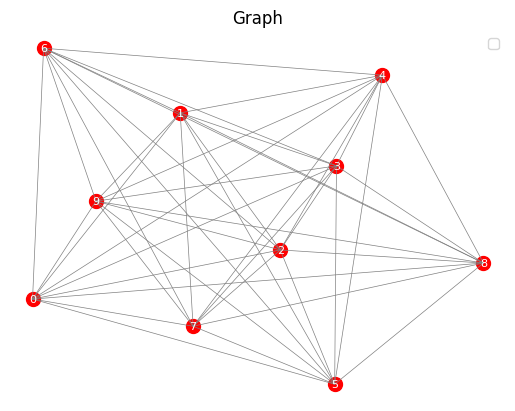

In [10]:
random_graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
random_graph.plot_graph()

De plus nous pouvons générer un graphe entre différentes villes 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


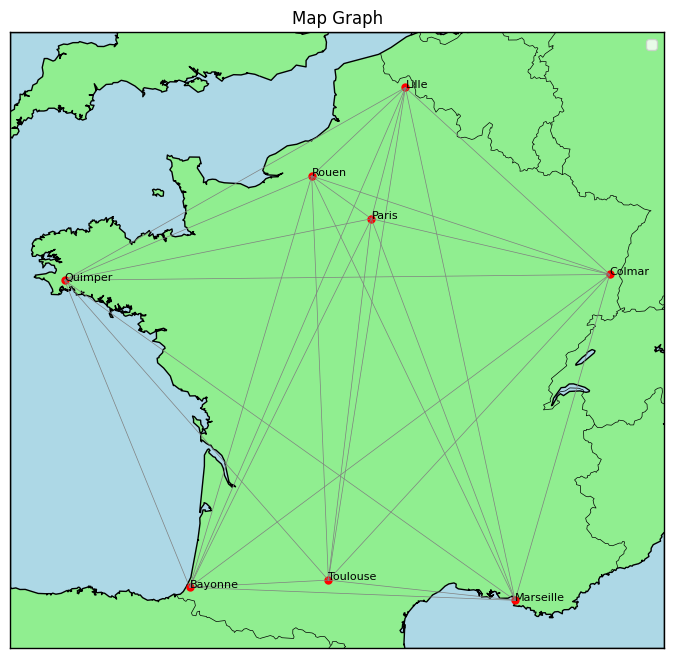

In [11]:
        
cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]

graph = MapGraph(cities=cities,start_city="Rouen")
graph.plot_graph()


### Filtration

Une fois le graphe généré, nous avons la possibilitée de filtrer ce graphe en y ajoutant une probabilité de route barré ainsi que de route couteuse. Les routes barrés sont représentés en **arêtes rouges fines** tandis que les routes conteuses se distinguent par une **arête rouge épaisse**.


Removed 4 edges of 28
Costed 4 edges of 24


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


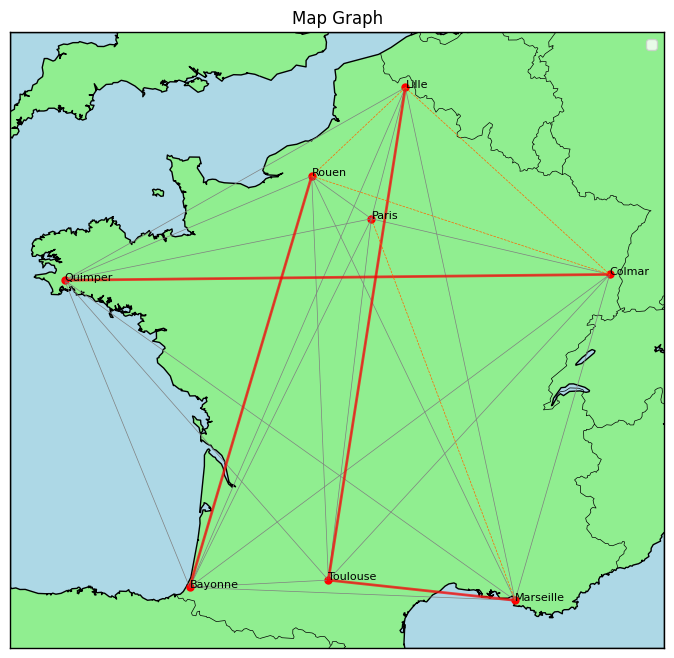

In [12]:
#Filtration
graph.apply_edge_blocking(percentage=20)
graph.apply_edge_costly(percentage=20)

graph.plot_graph()

## Métaheuristique 1 : Algorithme Tabou
### Modélisation algorithmique  
L'algorithme de par trajectoire de recherche avec tabou fonctionne de la manière suivante:  

#### Génération d'une solution initiale aléatoire
L’algorithme commence par créer une solution de départ, choisie aléatoirement ou via une heuristique simple. Cette solution représente un point de départ dans l’espace de recherche.

#### Génération des voisins
À partir de cette solution initiale, on génère un ensemble de solutions voisines. Ces voisins sont obtenus en effectuant des modifications mineures sur la solution actuelle (par exemple, échanger deux éléments, déplacer un nœud, etc.).

#### Évaluation des voisins et comparaison
On évalue chaque solution voisine en fonction de notre fonction de coût ($\sum_{k=1}^{n_v} TV \min \sum_{k=TV_1}^{TV_n} w(i, j)$ soit minimisé.
). L’algorithme identifie la meilleure solution parmi ces voisins (c’est-à-dire celle avec la distance la plus courte sur la somme des véhicules).

Ensuite, cette solution est comparée à celles enregistrées dans la liste tabou :

Si cette solution n’est pas dans la liste tabou, ou si elle est meilleure que la meilleure solution globale trouvée jusque-là, alors elle est acceptée comme nouvelle solution courante.

Elle est ensuite ajoutée à la liste tabou, pour éviter qu’elle ne soit choisie à nouveau pendant un certain nombre d’itérations.

#### Mise à jour de la liste tabou
La liste tabou fonctionne comme une file à durée limitée : après un certain nombre d’itérations , les anciennes solutions sont retirés pour laisser place aux nouvelles. Cela permet de préserver la diversité des solutions explorées.

#### Répétition sur n itération
Ce processus est répété pendant un nombre fixé d’itérations n. À chaque itération, le but est soit de trouver une meilleure solution, soit d’éviter de rester bloqué dans un minimum local grâce à l’interdiction temporaire de certaines solutions.

#### Retour de la meilleure solution trouvée
Une fois le nombre d’itérations terminé, l’algorithme renvoie la meilleure solution rencontrée au cours de la recherche. Il ne s’agit pas nécessairement de la dernière solution visitée, mais de la meilleure connue (enregistrée dans la liste tabou).



### implémentation python
En python, six paramètres ont été défini pour la classe de notre algorithme :
- size_tabou : Taille de la iste tabou qui permet à l'algorihme d'éviter de prendre des chemins déjà empruntés et de permettre une diversification importante
- num_vehicles : nombre de véhicules 
- min_iterations : nombre minimum d'itération
- max_iterations :nombre maximum d'itération
- convergence_threshold : une fois le nombre minimum d'itération dépassé comptele nombre de fois d'affilé ou l'algorithme ne trouve pas une meilleure solution que la solution précédente (ce paramètre permet avec un nombre itération plus grand que le nombre de solution possible d'arrêter l'éxecution)


In [13]:
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from utils.plot import Plot
import time  


def time_over_iterations_comparison(graph,algorithms, max_iterations, step = 1, single_plot = True, full_plot = True):
    time_results = {algo.name: [] for algo in algorithms}
    iteration_range = range(1, max_iterations + 1, step)
    for algorithm in algorithms:
        algorithm.convergence_threshold = 0
        for i in iteration_range:
            algorithm.max_iterations = i
            algorithm.min_iterations = i
            algorithm.run()
            time_results[algorithm.name].append(algorithm.execution_time)
            print(f"{algorithm.name} - Iterations: {i} of {max_iterations}, Time: {algorithm.execution_time}s")
        if single_plot:
            single_time_result = {}
            single_time_result[algorithm.name] = time_results[algorithm.name]
            Plot.plot_time_over_iterations_comparison(single_time_result,step)
    if full_plot:
        Plot.plot_time_over_iterations_comparison(time_results,step)

def distance_over_iterations_comparison(graph,algorithms, single_plot = True, full_plot = True, plot_path_single = True, full_path_plot = False):
    algorithms_distance_results = {}
    for algorithm in algorithms:
        algorithm.run()
        algorithms_distance_results[algorithm.name] = algorithm.distance_history
        if single_plot:
            single_distance_results = {}
            single_distance_results[algorithm.name] = algorithm.distance_history
            Plot.plot_distance_over_iterations_comparison(single_distance_results)
    if full_plot:
        Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)

# Display results for one algorithm
def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    # Print the best path found and the total distance
    graph.plot_graph(current_path_results)
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    
# Display results for multiple algorithms

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        start_time = time.time()
        run_algorithm(graph, algorithm)
        end_time = time.time()
        duration = end_time - start_time
        print(f"{algorithm.name} terminé en {duration:.2f} sec.\n")

    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
    # graph.plot_graph(algorithms_path_results)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100




### Etude expérimentale
#### Plan d’expérience
Pour tester l’efficacité de l’algorithme de recherche avec tabou, nous avons défini plusieurs paramètres importants :

- Le nombre de sommets du graphe

- La probabilité de présence d’arêtes

- La probabilité de routes bloquées

- Le nombre d’itérations de l’algorithme

- La taille de la liste tabou

- Le nombre de véhicule

Nous avons généré plusieurs graphes aléatoires en faisant varier ces paramètres, puis lancé l’algorithme sur chacun d’eux pour observer son comportement. Cela nous a permis de tester différentes configurations et d’en mesurer l’impact sur la qualité de la solution trouvée.



#### Etude d'expérience  :
##### Variation du temps en fonction du nombre d'itérations

In [14]:
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=1, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]



# Graph generation
graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

time_over_iterations_comparison(graph= graph,algorithms=algorithms, max_iterations=1000, step=50, single_plot=False)

#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results



Tabu Search - Iterations: 1 of 1000, Time: 0.0029230117797851562s
Tabu Search - Iterations: 51 of 1000, Time: 3.35066294670105s
Tabu Search - Iterations: 101 of 1000, Time: 12.9912588596344s
Tabu Search - Iterations: 151 of 1000, Time: 29.03390884399414s
Tabu Search - Iterations: 201 of 1000, Time: 53.277945041656494s


KeyboardInterrupt: 

En tracant un graphe du temps d'execution en fonction du nombre d'itération on remarque que notre le temps d'exécution est expodentielle par rapport au nombre d'itération. **Nous voulons donc réduire un maximum le nombre d'itération afin de limiter grandement le temps d'exécution**.

# variation du temps en fonction du pourcentage d'arete bloqués

In [15]:
def time_vs_blocked_edges(graph_generator, algorithm_class, blocked_percentages, max_iterations):
    """
    Affiche la variation du temps d'exécution en fonction du pourcentage d'arêtes bloquées.

    :param graph_generator: une fonction prenant un pourcentage et retournant un graphe avec ce % d’arêtes bloquées.
    :param algorithm_class: une classe d’algorithme (par ex. TabuAlgo).
    :param blocked_percentages: liste de pourcentages d’arêtes bloquées à tester.
    :param max_iterations: nombre d’itérations pour chaque exécution de l’algorithme.
    """
    times = []

    for p in blocked_percentages:
        graph = graph_generator(p)
        algorithm = algorithm_class(graph, max_iterations=max_iterations)
        algorithm.convergence_threshold = 0
        algorithm.run()
        print(f"{algorithm.name} - {p}% d'arêtes bloquées : {algorithm.execution_time:.4f} sec")
        times.append(algorithm.execution_time)

    # Tracer le résultat
    Plot.plot_time_vs_blocked_edges(blocked_percentages, times)

time_vs_blocked_edges(graph= graph,algorithms=algorithms,max_iterations=100, blocked_percentages=20)


TypeError: time_vs_blocked_edges() got an unexpected keyword argument 'graph'

# variation du temps en fonction du nombre de sommets

# variation du temps en fonction de la taille de la liste tabou

# variation du temps en fonction de la taille du nombre de véhicule

Algorithm Tabu Search : 



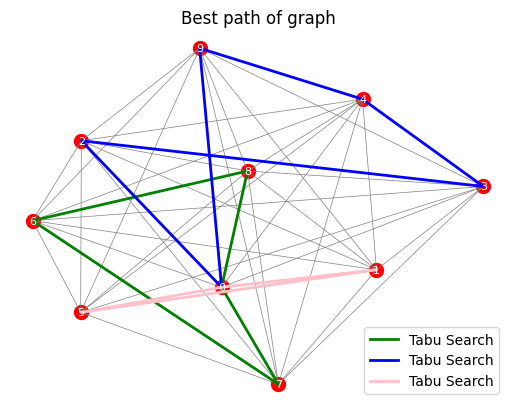

Best paths: [[0, 8, 6, 7, 0], [0, 2, 3, 4, 9, 0], [0, 1, 5, 0]]
Total distance: 498.8074854075964
Number of iterations needed to find the solution : 24
Total number of iterations : 49
Tabu Search terminé en 5.60 sec.



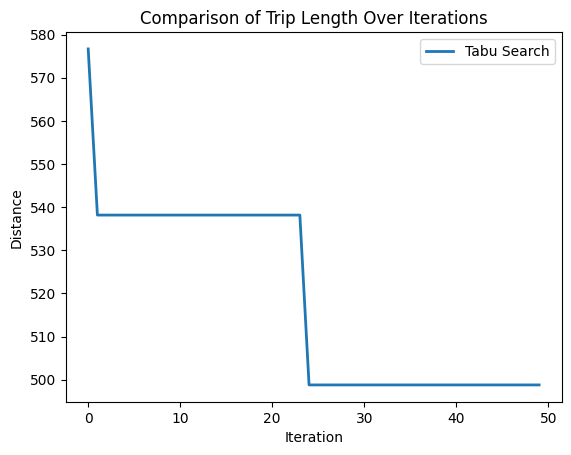

In [16]:
# Graph generation
graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]

run_algorithms(graph= graph,algorithms=algorithms)
#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results


#### Etude de trajectoire
Nous devons vérifier l'évolution de notre meilleur résultat au cours des itérations car 


**Nous avons observé l’évolution du coût de la solution à chaque itération de l’algorithme.
L’étude de trajectoire met en évidence comment l’algorithme s’améliore au fil du temps. Au départ, la solution est aléatoire et peu optimale. Au fur et à mesure des itérations, le mécanisme de recherche dans le voisinage, combiné au filtrage via la liste tabou, permet d’éviter les cycles et d’explorer efficacement l’espace des solutions.
Cette trajectoire montre typiquement une diminution progressive du coût, avec parfois des phases de stagnation ou de rechute dues à l’exploration forcée hors des minima locaux.**


##### Variation de la distance en fonction du nombre d'itération (avec variation taille de graphes)



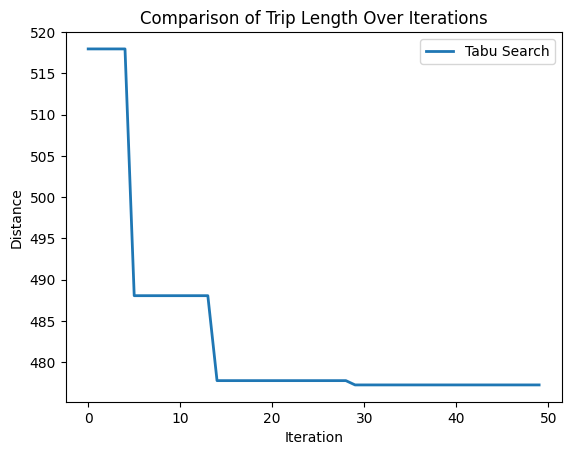

In [ ]:
# Graph generation
graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]

distance_over_iterations_comparison(graph= graph,algorithms=algorithms, single_plot=False)
#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results


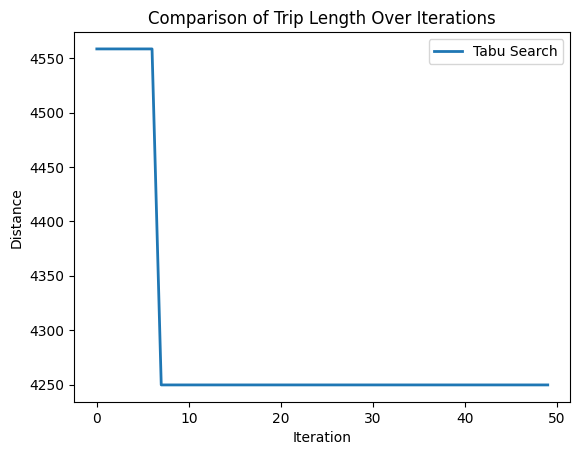

In [ ]:
# Graph generation
graph = RandomGraph(node_number=100,min_weight=1,max_weight=100)
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [TABU]

distance_over_iterations_comparison(graph= graph,algorithms=algorithms, single_plot=False)
#reset all datas
del TABU
del algorithms
del algorithms_distance_results
del algorithms_path_results


ok
1 node step realized on 100
11 node step realized on 100


/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


21 node step realized on 100
31 node step realized on 100
41 node step realized on 100
51 node step realized on 100
61 node step realized on 100
71 node step realized on 100
81 node step realized on 100
91 node step realized on 100


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


101 node step realized on 100


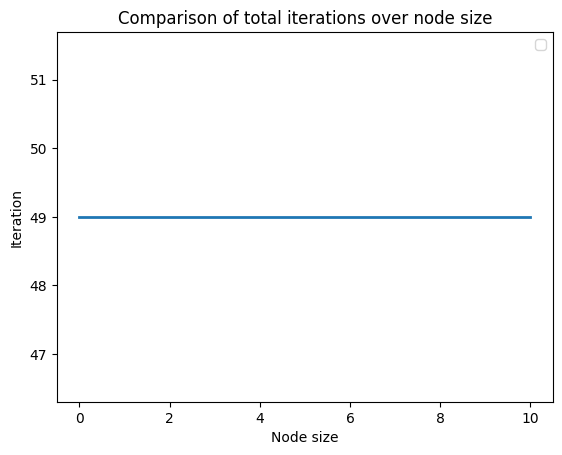

In [ ]:
def get_iteration_over_node_size(max_node_number = 100, threshold = 20, step = 10):
    if(max_node_number < 6):
        max_node_number=6
    iterations = []
    iteration_range = range(1,max_node_number + 2, step)
    for i in iteration_range:
        graph = RandomGraph(node_number=i,min_weight=1,max_weight=100)
        TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=3, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=10)
        TABU.run()
        iterations.append(TABU.total_interations_realized)
        print(f"{i} node step realized on {max_node_number}")
    Plot.plot_iterations_over_node_sizes(iterations)



get_iteration_over_node_size(max_node_number = 100, threshold = 20, step = 10)




Avec les graphes de la variation de la distance trouvée par rapport au nombre d'itération on remarque que **plus le nombre de sommets est élevé plus un nombre d'itération est nécessaire pour trouver la solution optimale.**

# Variation de la distance en fonction de la taille du graphe sur de nombreuses itérations

# Variation de la distance (avec petit graphe) en fonction de la taille de la liste tabou



#### Etude statistique
**Pour évaluer la robustesse de l’algorithme, nous avons effectué plusieurs exécutions (par exemple, 30) sur les mêmes graphes avec différents tirages aléatoires.
Nous avons calculé :

La moyenne des coûts obtenus

L’écart-type, indiquant la stabilité de l’algorithme

Le temps d’exécution moyen

Ces résultats nous ont permis de vérifier si l’algorithme est constant, rapide et capable de trouver des solutions proches de l’optimum de manière répétée.**



#### propositions d'améliorations




## Métaheuristique 2 : Algorithme des colonies de fourmis
### Modélisation algorthmique   

### implémentation python

### Etude expérimentale

#### Plan d’expérience

#### Etude de trajectoire

#### Etude statistique

#### propositions d'amélioration



## Métaheuristique 3 : Algorithme génétique
### Modélisation algorthmique   
### implémentation python

### Etude expérimentale

#### Plan d’expérience

#### Etude de trajectoire

#### Etude statistique

#### propositions d'amélioration


## Conclusion

## Métaheuristique 2 : Algorithme Génétique  
### Modélisation algorithmique  
L'algorithme génétique est une méthode inspirée de l’évolution naturelle. Il cherche à optimiser une solution (ici, la répartition des tournées de plusieurs véhicules) en la faisant évoluer sur plusieurs générations de solutions.

---

### Génération de la population initiale  
L’algorithme commence par **créer un ensemble de solutions initiales aléatoires**.  
Chaque solution correspond à une répartition des points de livraison entre les véhicules, chaque tournée commençant et se terminant au dépôt.

---

### Évaluation des solutions  
Chaque solution est **évaluée selon deux critères** :  
- La **distance totale parcourue** par tous les véhicules.  
- L’**équilibre entre les véhicules** (écart-type des distances).

Un score est attribué à chaque solution pour guider la sélection.

---

### Sélection des meilleurs individus  
Les solutions sont triées selon leur performance (score).  
On **conserve la moitié des meilleures** (appelées “survivants”) pour la génération suivante.

---

### Croisement (reproduction)  
On sélectionne des paires de survivants pour créer de nouvelles solutions (“enfants”) :  
- On **combine partiellement les tournées** de deux parents.
- On **complète les tournées** avec les points manquants, en évitant les doublons.
- Chaque tournée reste valide : elle couvre tous les points une seule fois, avec un retour au dépôt.

---

### Mutation  
Pour **maintenir la diversité**, certaines solutions subissent une **modification aléatoire légère** :  
- On échange deux points de livraison dans une tournée, avec une certaine probabilité.  
Cela permet d'explorer des zones de l’espace de recherche non visitées.

---

### Critère de convergence  
L’algorithme répète le processus (sélection → croisement → mutation) à chaque itération.  
Il s’arrête lorsque :  
- Un nombre maximal d’itérations est atteint, ou  
- **La meilleure solution ne s’améliore plus pendant un certain nombre d’itérations.**

---

### Retour de la meilleure solution trouvée  
À la fin, l’algorithme **renvoie la meilleure solution trouvée** durant toute la recherche :  
- Il ne s’agit pas forcément de la dernière, mais de celle avec le **meilleur compromis** entre distance totale et équilibre entre les véhicules.

# Implémentation Python
## Dans l’algorithme génétique, plusieurs paramètres ont été définis dans la classe :

- solutions_in_parallel : Nombre de solutions (populations) générées et évaluées simultanément à chaque itération. Cela permet une meilleure exploration de l’espace de recherche.

- num_vehicles : Nombre de véhicules à utiliser dans la solution.

- min_iterations : Nombre minimal d’itérations à effectuer avant de vérifier la convergence.

- max_iterations : Nombre maximal d’itérations autorisées pour éviter un temps d’exécution trop long.

- convergence_threshold : Nombre de fois consécutives où la meilleure solution ne s’améliore pas avant d’arrêter l’exécution.

- mutation_rate : Taux de mutation appliqué aux solutions pour introduire de la diversité et éviter les optima locaux.


In [33]:
from Algorithms.Genetic.GeneticAlgo import GeneticAlgo
from utils.plot import Plot
import time

# Comparaison du temps d'exécution par rapport au nombre d'itérations
def time_over_iterations_comparison(graph, algorithms, max_iterations, step=1, single_plot=True, full_plot=True):
    time_results = {algo.name: [] for algo in algorithms}
    iteration_range = range(1, max_iterations + 1, step)
    for algorithm in algorithms:
        algorithm.convergence_threshold = 0
        for i in iteration_range:
            algorithm.max_iterations = i
            algorithm.min_iterations = i
            algorithm.run()
            time_results[algorithm.name].append(algorithm.execution_time)
            print(f"{algorithm.name} - Iterations: {i}, Time: {algorithm.execution_time}s")
        if single_plot:
            Plot.plot_time_over_iterations_comparison({algorithm.name: time_results[algorithm.name]}, step)
    if full_plot:
        Plot.plot_time_over_iterations_comparison(time_results, step)

# Comparaison de l’évolution de la distance au cours des itérations
def distance_over_iterations_comparison(graph, algorithms, single_plot=True, full_plot=True):
    algorithms_distance_results = {}
    for algorithm in algorithms:
        algorithm.run()
        algorithms_distance_results[algorithm.name] = algorithm.distance_history
        if single_plot:
            Plot.plot_distance_over_iterations_comparison({algorithm.name: algorithm.distance_history})
    if full_plot:
        Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)

# Lancer et afficher les résultats pour un seul algorithme
def run_algorithm(graph, algorithm):
    algorithm.run()
    print(f"Résultats pour {algorithm.name} :")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {algorithm.name: vehicles_paths}
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    graph.plot_graph(current_path_results)
    print(f"Chemins trouvés : {algorithm.paths}")
    print(f"Distance totale : {algorithm.distance}")
    print(f"Nombre d’itérations nécessaires : {algorithm.iterations_needed}")
    print(f"Nombre total d’itérations effectuées : {algorithm.total_interations_realized}")

# Lancer plusieurs algorithmes à la suite
def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        start_time = time.time()
        run_algorithm(graph, algorithm)
        duration = time.time() - start_time
        print(f"{algorithm.name} terminé en {duration:.2f} secondes.\n")
    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)

algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 50
convergence_threshold = 100


Très bien ! Voici maintenant la **version équivalente pour ton algorithme génétique**, structurée de la même façon pour intégrer dans ton rapport ou ta présentation.

---

### Étude expérimentale
#### Plan d’expérience
Pour tester l’efficacité de l’**algorithme génétique**, nous avons défini plusieurs paramètres clés qui influencent son comportement :

- Le **nombre de sommets** dans le graphe  
- La **densité d’arêtes** (probabilité qu’une arête soit présente)
- La **proportion de routes bloquées** (inaccessibles)  
- Le **nombre de véhicules**
- Le **nombre d’itérations** maximum
- Le **taux de mutation** de l’algorithme génétique
- Le **nombre de solutions simultanées** dans la population

Nous avons généré aléatoirement plusieurs graphes avec différentes configurations, puis appliqué l’algorithme sur chacun d’eux afin d’observer les effets des variations de paramètres sur les performances (temps de calcul et qualité des solutions).

---

#### Étude d’expérience :  
##### Variation du temps en fonction du nombre d'itérations


Genetic Algorithm - Iterations: 1, Time: 0.002251863479614258s
Genetic Algorithm - Iterations: 51, Time: 0.008450984954833984s
Genetic Algorithm - Iterations: 101, Time: 0.013539791107177734s
Genetic Algorithm - Iterations: 151, Time: 0.01656174659729004s
Genetic Algorithm - Iterations: 201, Time: 0.018897056579589844s
Genetic Algorithm - Iterations: 251, Time: 0.021939992904663086s
Genetic Algorithm - Iterations: 301, Time: 0.02523493766784668s
Genetic Algorithm - Iterations: 351, Time: 0.029650211334228516s
Genetic Algorithm - Iterations: 401, Time: 0.03458380699157715s
Genetic Algorithm - Iterations: 451, Time: 0.03874993324279785s
Genetic Algorithm - Iterations: 501, Time: 0.04250812530517578s
Genetic Algorithm - Iterations: 551, Time: 0.0462498664855957s
Genetic Algorithm - Iterations: 601, Time: 0.05153369903564453s
Genetic Algorithm - Iterations: 651, Time: 0.058279991149902344s
Genetic Algorithm - Iterations: 701, Time: 0.060814857482910156s
Genetic Algorithm - Iterations: 751,

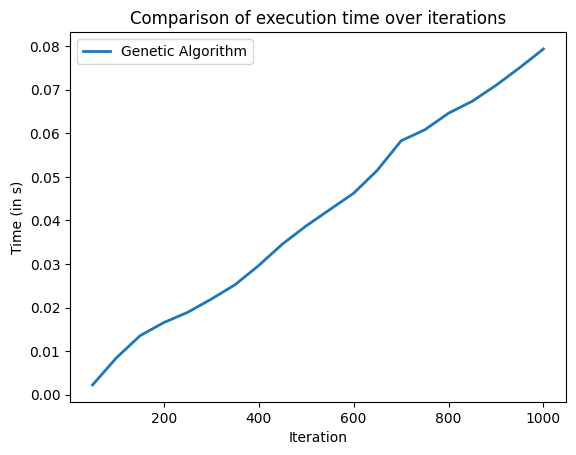

In [34]:
import sys

if "utils.plot" in sys.modules:
    del sys.modules["utils.plot"]
if "Algorithms.Genetic.GeneticAlgo" in sys.modules:
    del sys.modules["Algorithms.Genetic.GeneticAlgo"]

from Algorithms.Genetic.GeneticAlgo import GeneticAlgo
from Graphs.RandomGraph import RandomGraph
from utils.plot import Plot

# Création d’une instance de l’algorithme génétique
GENETIC = GeneticAlgo(graph=graph, name="Genetic Algorithm",
                      solutions_in_parallel=10,
                      mutation_rate=0.1,
                      num_vehicles=1,
                      min_iterations=min_iterations,
                      max_iterations=max_iterations,
                      convergence_threshold=convergence_threshold)

algorithms = [GENETIC]

# Génération du graphe aléatoire
graph = RandomGraph(node_number=10, min_weight=1, max_weight=100)

# Application de filtrage (aucune route bloquée ici pour simplifier l’analyse)
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

# Lancement de la mesure du temps d’exécution selon le nombre d’itérations
time_over_iterations_comparison(graph=graph, algorithms=algorithms,
                                 max_iterations=1000, step=50, single_plot=False)


5 sommets - Temps moyen : 0.0082 sec
10 sommets - Temps moyen : 0.0098 sec
15 sommets - Temps moyen : 0.0133 sec
20 sommets - Temps moyen : 0.0204 sec
25 sommets - Temps moyen : 0.0306 sec
30 sommets - Temps moyen : 0.0435 sec


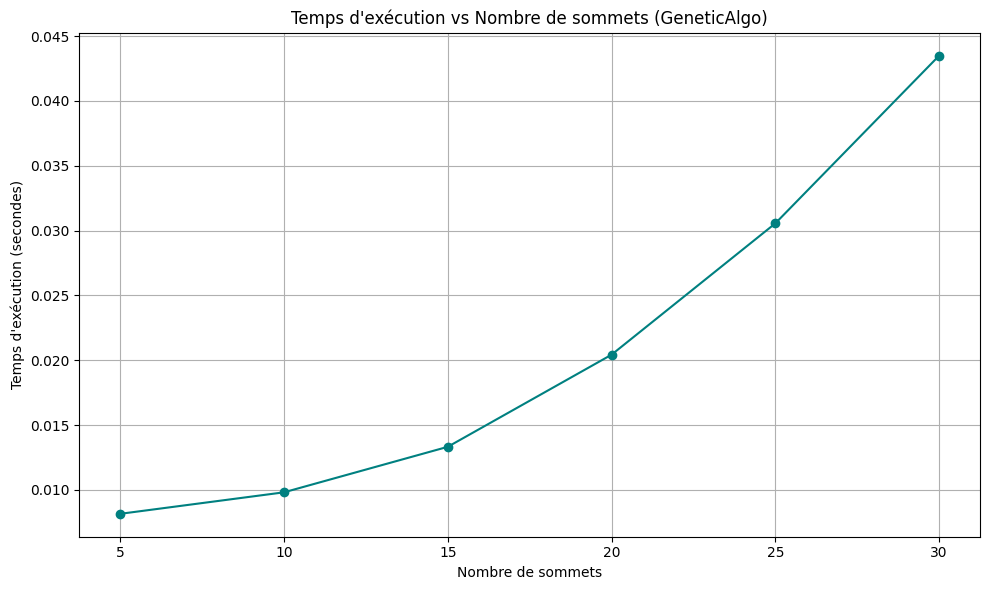

In [35]:
def test_geneticalgo_vs_node_count(node_counts, max_iterations=100):
    from Algorithms.Genetic.GeneticAlgo import GeneticAlgo
    from utils.plot import Plot

    times = []

    for n in node_counts:
        # Génération du graphe
        graph = RandomGraph(node_number=n, min_weight=1, max_weight=100)
        graph.apply_edge_blocking(percentage=0)  # désactive les blocages pour ce test

        # Configuration de l'algorithme génétique
        algo = GeneticAlgo(
            graph=graph,
            name=f"GeneticAlgo_{n}_nodes",
            solutions_in_parallel=10,
            num_vehicles=1,
            min_iterations=max_iterations,
            max_iterations=max_iterations,
            convergence_threshold=0
        )

        algo.run()
        print(f"{algo.name} - {n} sommets : {algo.execution_time:.4f} sec")
        times.append(algo.execution_time)

    Plot.plot_time_vs_node_count(node_counts, times)

node_counts = [5, 10, 15, 20, 25, 30]

def test_geneticalgo_avg_time_vs_node_count(node_counts, max_iterations=100, num_tests=10):

    avg_times = []

    for n in node_counts:
        total_time = 0
        for _ in range(num_tests):
            # Génération du graphe
            graph = RandomGraph(node_number=n, min_weight=1, max_weight=100)
            graph.apply_edge_blocking(percentage=0)  # désactive les blocages pour ce test

            # Configuration de l'algorithme génétique
            algo = GeneticAlgo(
                graph=graph,
                name=f"GeneticAlgo_{n}_nodes",
                solutions_in_parallel=10,
                num_vehicles=1,
                min_iterations=max_iterations,
                max_iterations=max_iterations,
                convergence_threshold=0
            )

            # Exécution et mesure du temps
            algo.run()
            total_time += algo.execution_time

        avg_time = total_time / num_tests
        print(f"{n} sommets - Temps moyen : {avg_time:.4f} sec")
        avg_times.append(avg_time)

    Plot.plot_time_vs_node_count(node_counts, avg_times)

test_geneticalgo_avg_time_vs_node_count(node_counts, max_iterations=100, num_tests=100)


# variation du temps en fonction de la taille du nombre de véhicule

1 véhicules - Temps moyen : 0.0144 sec
2 véhicules - Temps moyen : 0.0145 sec
3 véhicules - Temps moyen : 0.0142 sec
4 véhicules - Temps moyen : 0.0140 sec
5 véhicules - Temps moyen : 0.0134 sec


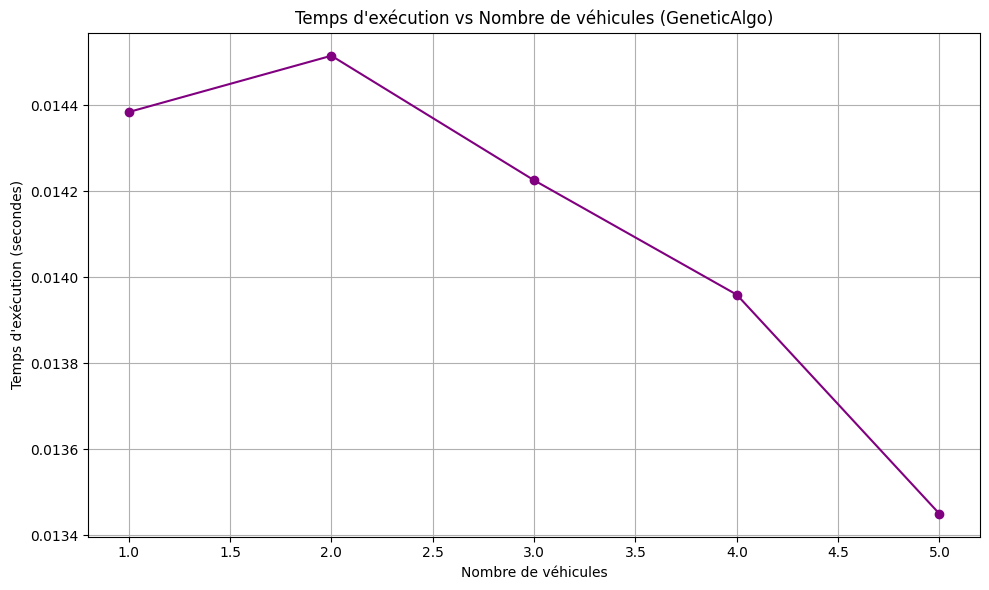

In [37]:
def time_vs_vehicle_count_avg(graph_generator, algorithm_class, vehicle_counts, max_iterations, num_tests=10):
    avg_times = []

    for num_vehicles in vehicle_counts:
        total_time = 0
        for _ in range(num_tests):
            graph = graph_generator()
            algorithm = algorithm_class(
                graph=graph,
                name=f"Genetic {num_vehicles} véhicules",
                solutions_in_parallel=10,
                num_vehicles=num_vehicles,
                min_iterations=max_iterations,
                max_iterations=max_iterations,
                convergence_threshold=0
            )
            algorithm.run()
            total_time += algorithm.execution_time
        avg_time = total_time / num_tests
        print(f"{num_vehicles} véhicules - Temps moyen : {avg_time:.4f} sec")
        avg_times.append(avg_time)

    Plot.plot_time_vs_vehicle_count(vehicle_counts, avg_times)

def graph_generator():
    g = RandomGraph(node_number=20, min_weight=1, max_weight=100)
    g.apply_edge_blocking(percentage=0)
    return g

vehicle_counts = [1, 2, 3, 4, 5]

time_vs_vehicle_count_avg(graph_generator, GeneticAlgo, vehicle_counts, max_iterations, num_tests=100)

# Bloc : Temps d'exécution vs Nombre de solutions parallèles

5 solutions parallèles - Temps moyen : 0.0152 sec
10 solutions parallèles - Temps moyen : 0.0206 sec
20 solutions parallèles - Temps moyen : 0.0307 sec
30 solutions parallèles - Temps moyen : 0.0399 sec
50 solutions parallèles - Temps moyen : 0.0578 sec


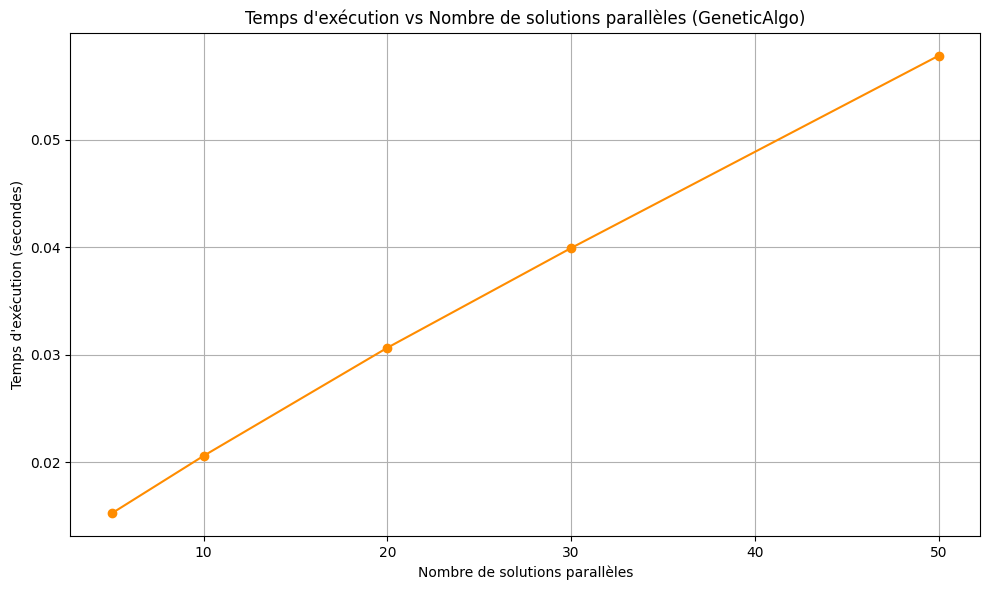

In [43]:
def time_vs_parallel_solutions_avg(graph_generator, algorithm_class, parallel_counts, num_vehicles, max_iterations, num_tests=10):
    avg_times = []

    for count in parallel_counts:
        total_time = 0
        for _ in range(num_tests):
            graph = graph_generator()
            algorithm = algorithm_class(
                graph=graph,
                name=f"Genetic {count} solutions",
                solutions_in_parallel=count,
                num_vehicles=num_vehicles,
                min_iterations=max_iterations,
                max_iterations=max_iterations,
                convergence_threshold=0
            )
            algorithm.run()
            total_time += algorithm.execution_time
        avg_time = total_time / num_tests
        print(f"{count} solutions parallèles - Temps moyen : {avg_time:.4f} sec")
        avg_times.append(avg_time)

    Plot.plot_time_vs_parallel_solutions(parallel_counts, avg_times)



parallel_counts = [5, 10, 20, 30, 50]
num_vehicles = 2
max_iterations = 100

def graph_generator():
    g = RandomGraph(node_number=20, min_weight=1, max_weight=100)
    g.apply_edge_blocking(percentage=0)
    return g

time_vs_parallel_solutions_avg(graph_generator, GeneticAlgo, parallel_counts, num_vehicles, max_iterations, num_tests=10)


# Étude de la distance totale en fonction du taux de mutation

Taux de mutation 0.05 : Distance moyenne = 307.8302260622746
Taux de mutation 0.06 : Distance moyenne = 310.04611462497223
Taux de mutation 0.07 : Distance moyenne = 306.84770345676566
Taux de mutation 0.08 : Distance moyenne = 310.5182093673251
Taux de mutation 0.09 : Distance moyenne = 306.4284024001101
Taux de mutation 0.1 : Distance moyenne = 307.8234456133845
Taux de mutation 0.11 : Distance moyenne = 300.3617153326995
Taux de mutation 0.12 : Distance moyenne = 304.51561613829045
Taux de mutation 0.13 : Distance moyenne = 308.53160046214964
Taux de mutation 0.14 : Distance moyenne = 306.99184348230085


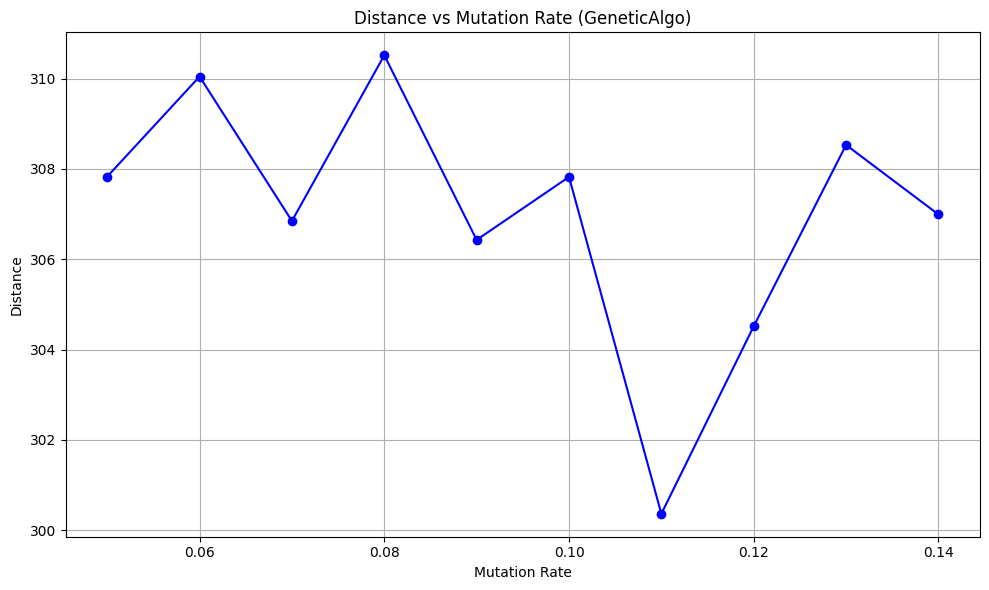

In [44]:
def distance_vs_mutation_rate_avg(graph_generator, algorithm_class, mutation_rates, num_vehicles, max_iterations, num_tests=10):
    avg_distances = []

    for rate in mutation_rates:
        total_distance = 0
        for _ in range(num_tests):
            graph = graph_generator()
            algorithm = algorithm_class(
                graph=graph,
                name=f"Genetic Mutation Rate {rate}",
                solutions_in_parallel=10,
                mutation_rate=rate,
                num_vehicles=num_vehicles,
                min_iterations=max_iterations,
                max_iterations=max_iterations,
                convergence_threshold=0
            )
            algorithm.run()
            total_distance += algorithm.distance
        avg_distance = total_distance / num_tests
        print(f"Taux de mutation {rate} : Distance moyenne = {avg_distance}")
        avg_distances.append(avg_distance)

    Plot.plot_distance_vs_mutation_rate(mutation_rates, avg_distances)

distance_vs_mutation_rate_avg(graph_generator, GeneticAlgo, [i/100 for i in range(5,15)], num_vehicles, max_iterations, num_tests=100)


# Temps en fonction du nombre d'arêtes bloquées

GeneticAlgo - 0% - 0% d'arêtes bloquées : 0.0333 sec
Removed 17 edges of 190
GeneticAlgo - 10% - 10% d'arêtes bloquées : 0.0267 sec
Removed 34 edges of 190
GeneticAlgo - 20% - 20% d'arêtes bloquées : 0.0204 sec
Removed 51 edges of 190
GeneticAlgo - 30% - 30% d'arêtes bloquées : 0.0195 sec
Removed 68 edges of 190
GeneticAlgo - 40% - 40% d'arêtes bloquées : 0.0179 sec


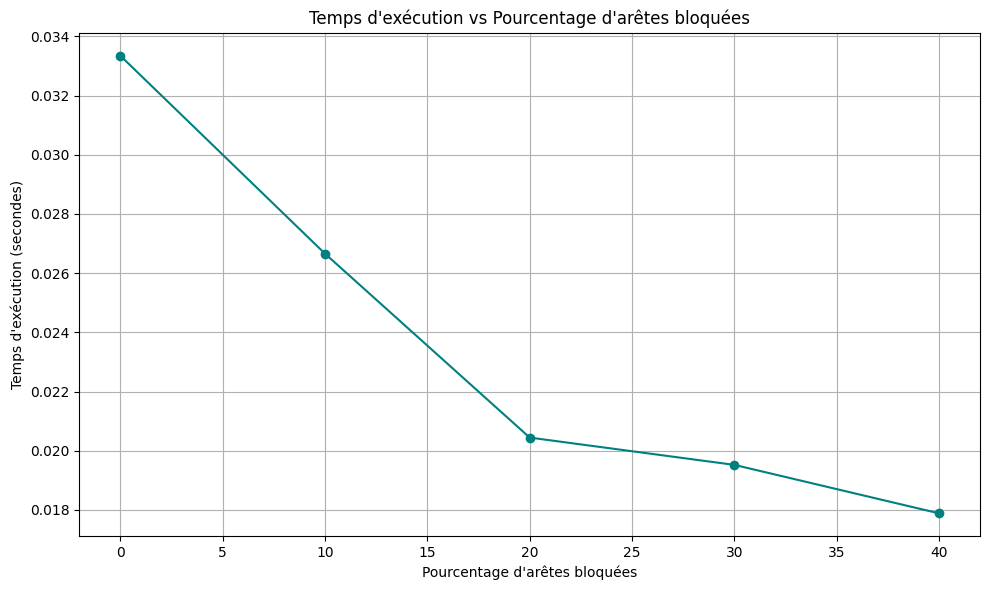

In [45]:
def time_vs_blocked_edges(graph_generator, algorithm_class, blocked_percentages, max_iterations):
    """
    Affiche la variation du temps d'exécution en fonction du pourcentage d'arêtes bloquées.

    :param graph_generator: une fonction prenant un pourcentage et retournant un graphe avec ce % d’arêtes bloquées.
    :param algorithm_class: une classe d’algorithme (par ex. GeneticAlgo).
    :param blocked_percentages: liste de pourcentages d’arêtes bloquées à tester.
    :param max_iterations: nombre d’itérations pour chaque exécution de l’algorithme.
    """
    times = []

    for p in blocked_percentages:
        graph = graph_generator(p)
        algorithm = algorithm_class(
            graph=graph,
            name=f"{algorithm_class.__name__} - {p}%",
            solutions_in_parallel=10,  # paramètre spécifique à GeneticAlgo
            num_vehicles=2,
            min_iterations=max_iterations,
            max_iterations=max_iterations,
            convergence_threshold=0
        )
        algorithm.run()
        print(f"{algorithm.name} - {p}% d'arêtes bloquées : {algorithm.execution_time:.4f} sec")
        times.append(algorithm.execution_time)

    # Tracer le résultat
    Plot.plot_time_vs_blocked_edges(blocked_percentages, times)

blocked_percentages = [0, 10, 20, 30, 40]
max_iterations = 100

def graph_generator(blocked_percentage):
    g = RandomGraph(node_number=20, min_weight=1, max_weight=100)
    g.apply_edge_blocking(percentage=blocked_percentage)
    return g


time_vs_blocked_edges(
    graph_generator=graph_generator,
    algorithm_class=GeneticAlgo,
    blocked_percentages=blocked_percentages,
    max_iterations=max_iterations
)


# Bibliographie
* [TSP wiki](https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce)
* [(TSP) exemple](https://docs.mosek.com/latest/dotnetfusion/case-studies-tsp.html)
* [VRP](https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_tourn%C3%A9es_de_v%C3%A9hicules)

* [Réductions polynomiales](https://datamove.imag.fr/denis.trystram/SupportsDeCours/lesson4reductions.pdf)

* [Les 21 problèmes NP-complets de Karp](https://fr.wikipedia.org/wiki/21_probl%C3%A8mes_NP-complets_de_Karp)

* [The Complexity of Theorem-Proving Procedures](https://www.inf.unibz.it/~calvanese/teaching/14-15-tc/material/cook-1971-NP-completeness-of-SAT.pdf)

* [REDUCIBILITY AMONG COMBINATORIAL PROBLEM](https://cgi.di.uoa.gr/~sgk/teaching/grad/handouts/karp.pdf)

